# Modeling Survey data

This document records modeling step. 

In [90]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *
from code.model_vis import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve
from sklearn.grid_search import GridSearchCV
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
survey = survey('data/survey')

### use the data set whose categorical variables are converted to dummie variable

In [81]:
survey.cat_processor()

In [25]:
df_cat = survey.fin_data

In [83]:
survey.data.head(3)

,sphrs1,agekdbrn,maeduc,maeduc_not_app,maeduc_dn_kwn,paeduc,paeduc_not_app,paeduc_dn_kwn,speduc,speduc_not_app,...,fepresch,fefam,helpsick,discaff,fejobaff,discaffm,discaffw,goodlife,meovrwrk,employed
0,42,22,12,False,False,-99,True,False,-99,False,...,Not applicable,Not applicable,Agree with both,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Neither agree nor disagree,True
3,50,27,13,False,False,-99,True,False,16,False,...,Agree,Disagree,Not applicable,Not very likely,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,False
4,80,38,17,False,False,-99,True,False,16,False,...,Agree,Agree,4,Not very likely,Not applicable,Not applicable,Not applicable,Agree,Not applicable,False


In [26]:
y = df_cat.pop('employed').values
X = df_cat.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest model

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rf.score(X_test,y_test)

0.83860121049092129

[[390 151]
 [ 89 857]]


/home/yihua/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


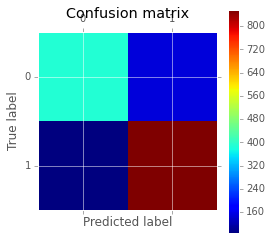

In [39]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.878622119401


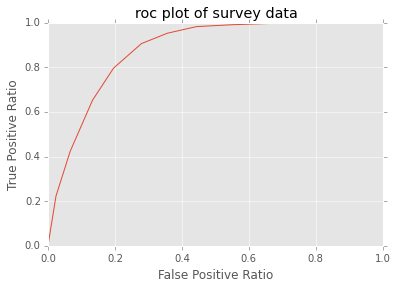

In [47]:
plot_roc(rf,X_test,y_test)


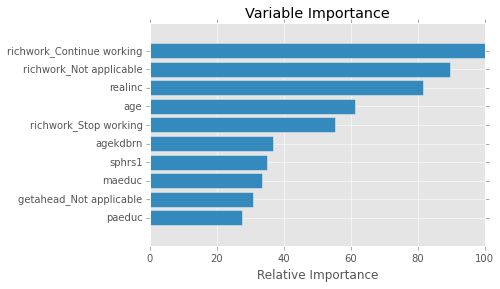

In [49]:
plot_importance(rf,df_cat)

In [85]:
df_cat.head(3).T

,0,3,4
sphrs1,42,50,80
agekdbrn,22,27,38
maeduc,12,13,17
maeduc_not_app,False,False,False
maeduc_dn_kwn,False,False,False
paeduc,-99,-99,-99
paeduc_not_app,True,True,True
paeduc_dn_kwn,False,False,False
speduc,-99,16,16
speduc_not_app,False,False,False


### Use data set whose categorical variables are converted to numerical variables

In [92]:
survey.num_processor()

In [4]:
df_num = survey.fin_data

In [5]:
y = df_num.pop('employed').values
X = df_num.values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
rf.score(X_test,y_test)

0.83860121049092129

[[410 131]
 [109 837]]


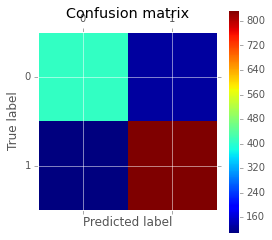

In [12]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.896173400601


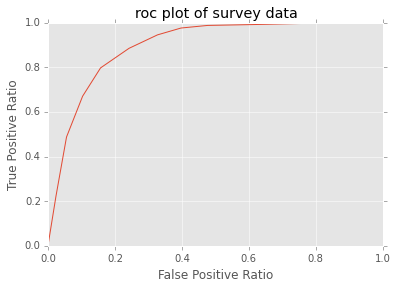

In [13]:
plot_roc(rf,X_test,y_test)

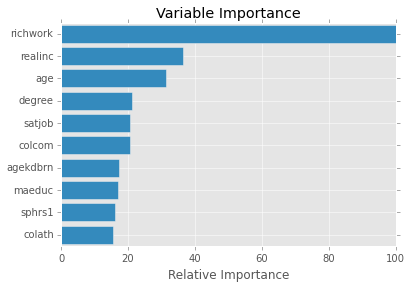

In [14]:
plot_importance(rf,df_num)

## richwork has information leakage. should drop this column

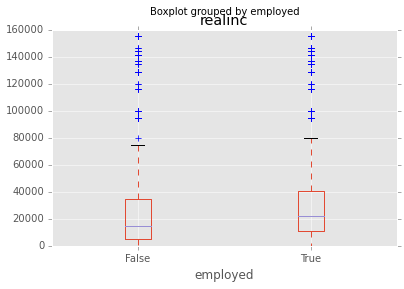

In [72]:
df.boxplot('realinc', by ="employed")

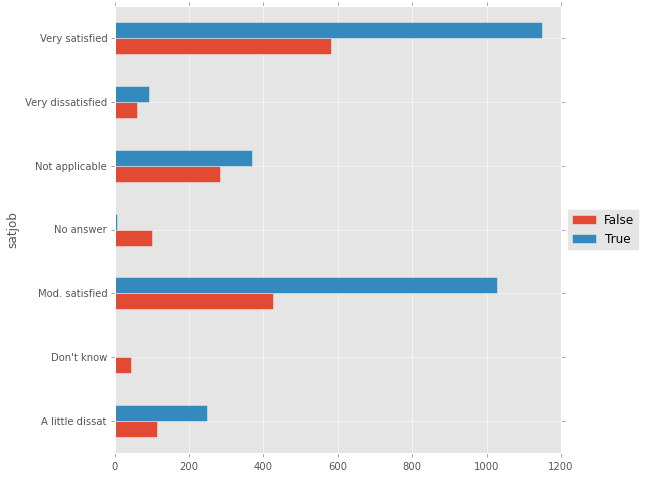

In [89]:
h_bar(df.satjob,df.employed)

## Only unemployed respondent checked "no answer" and "don't know". It is likely that they thought this question is asking about job, and since they don't work, they just pass this quesiton. Should drop this column

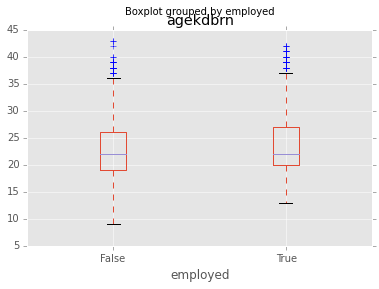

In [79]:
df.boxplot('agekdbrn', by ="employed")

## To do:
1. numerica dataframe yields higher roc. should use this.
1. download more features

2. drop all the questions related to work

3. grid search. 
4. check feature contribution




In [3]:
survey.num_processor()

In [93]:
df = survey.fin_data.copy()

df.drop(['richwork','satjob'],axis =1, inplace = True)

In [94]:
y = df.pop('employed').values
X = df.values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[294 247]
 [209 737]]


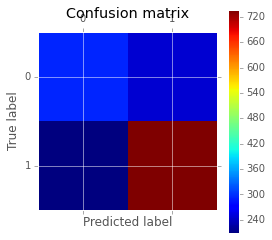

In [97]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.731794148335


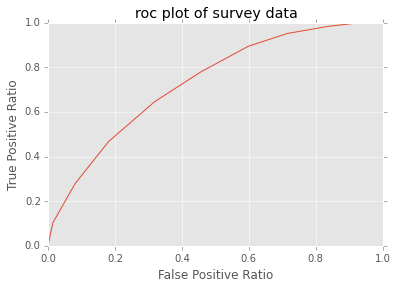

In [98]:
plot_roc(rf,X_test,y_test)

In [99]:
x = df.columns[rf.feature_importances_.argsort()[::-1][:30]]

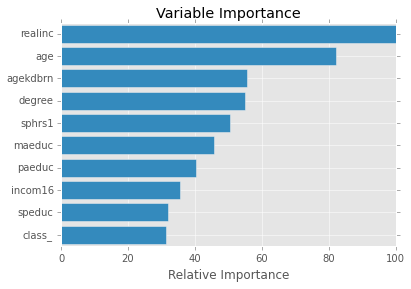

In [16]:
plot_importance(rf,df)

In [131]:
# rf_grid = {'max_depth': [3, None],
#                       'max_features': ['sqrt', 'log2', None],
#                       'criterion':['gini','entropy'],
#                       'min_samples_split': [1, 2, 4],
#                       'min_samples_leaf': [1, 2, 4],
#                       'bootstrap': [True, False],
#                       'n_estimators': [10, 20, 40],
#                       'random_state': [1]}


rf_grid = {'max_depth': [None],
                      'max_features': ['sqrt', 'log2'],
                      'criterion':['gini','entropy'],
                      'min_samples_split': [1],
                      'min_samples_leaf': [1],
                      'bootstrap': [False],
                      'n_estimators': [40,80]
          }

In [132]:
rf_cv=GridSearchCV(RandomForestClassifier(), rf_grid, n_jobs=-1, scoring = "roc_auc")

In [133]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'min_samples_leaf': [1], 'n_estimators': [40, 80], 'min_samples_split': [1], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [134]:
rf_cv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 80}

In [135]:
model = rf_cv.best_estimator_

[[240 301]
 [102 844]]


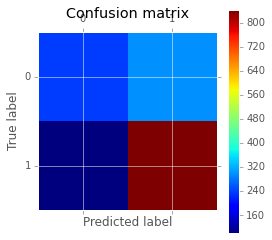

In [136]:
plot_confusion_matrix(model,X_test,y_test)

roc_auc_score : 0.791171505278


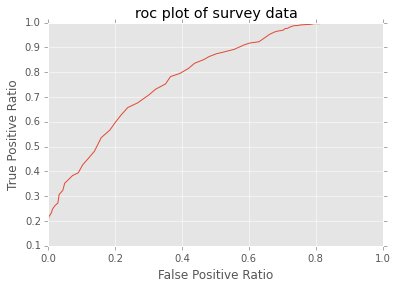

In [137]:
plot_roc(model,X_test,y_test)

In [31]:
var = extract_variables('data/survey/GSS.sps')

In [32]:
x = [i.upper() for i in x]

In [33]:
re_var = {k:v for (v,k) in var.iteritems()}

In [34]:
for i in x:
    print i,":", re_var[i]

REALINC : Family income in constant $
AGE : Age of respondent
AGEKDBRN : R's age when 1st child born
DEGREE : Rs highest degree
SPHRS1 : Number of hrs spouse worked last week
MAEDUC : Highest year school completed, mother
PAEDUC : Highest year school completed, father
INCOM16 : Rs family income when 16 yrs old
SPEDUC : Highest year school completed, spouse
CLASS_ : Subjective class identification
FECHLD : Mother working doesn't hurt children
FEFAM : Better for man to work, woman tend home
DISCAFF : Whites hurt by aff. action
MEOVRWRK : Men hurt family when focus on work too much
GOODLIFE : Standard of living of r will improve
HELPOTH : To help others
HAPMAR : Happiness of marriage
FINRELA : Opinion of family income
NATSPAC : Space exploration program
GETAHEAD : Opinion of how people get ahead
WRKWAYUP : Blacks overcome prejudice without favors 
AFFRMACT : Favor preference in hiring blacks
KIDSSOL : Rs kids living standard compared to r
SATFIN : Satisfaction with financial situation
NAT

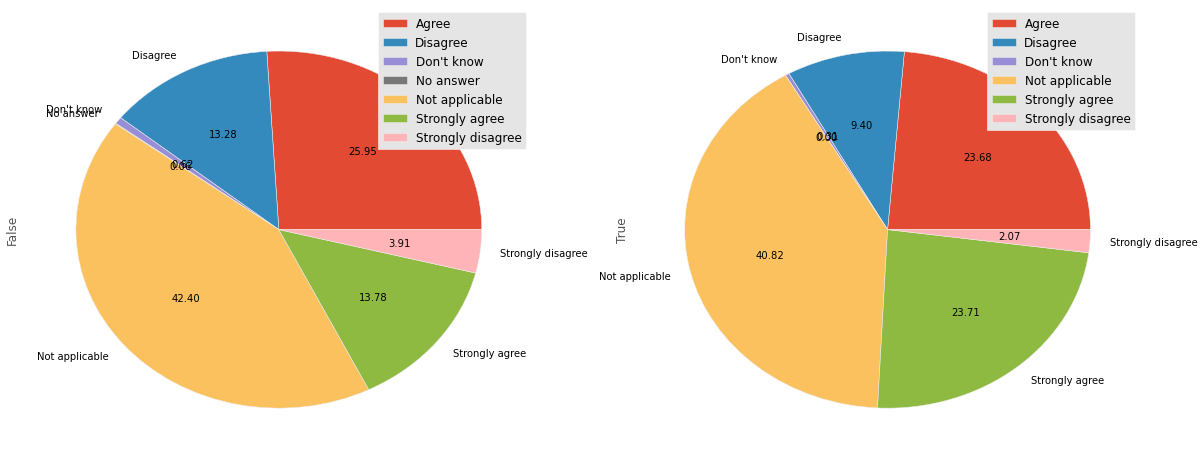

In [42]:
pie_chart(survey.data.employed,survey.data.fechld)